# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [ ]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [ ]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

In [ ]:
G.is_directed()

False

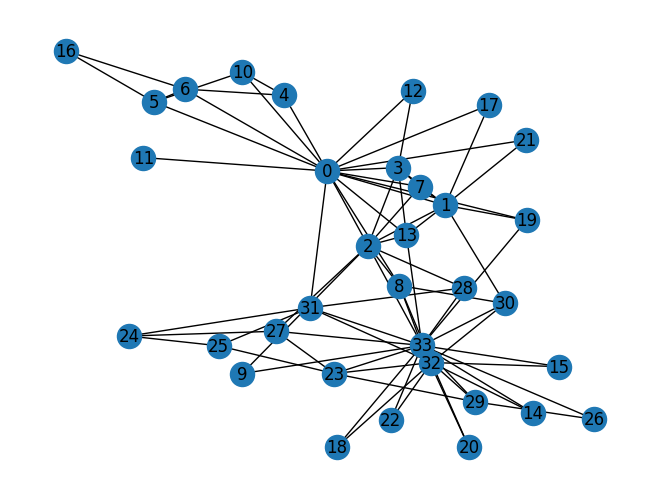

In [ ]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)

-> Done

In [ ]:
G.number_of_edges(), G.number_of_nodes()

(78, 34)

In [ ]:
G.is_directed()

False

In [ ]:
"""
전체 edge 수와 전체 node 수를 받아서 average degree를 계산하는 함수
"""
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############

  # in undirected graph, avg_degree need to be doubled.
  avg_degree = int(round(num_edges * 2 / num_nodes, 0))
  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}.".format(avg_degree))

Average degree of karate club network is 5.


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [ ]:
# nx.triangles(G) : 각 노드에서 만들 수 있는 triangle의 갯수를 딕셔너리형태로 반환.
triangles = nx.triangles(G)
print(triangles)

{0: 18, 1: 12, 2: 11, 3: 10, 4: 2, 5: 3, 6: 3, 7: 6, 8: 5, 9: 0, 10: 2, 11: 0, 12: 1, 13: 6, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 4, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 4, 30: 3, 31: 3, 32: 13, 33: 15}


In [ ]:
len(triangles), G.number_of_nodes()

(34, 34)

In [ ]:
"""
input : graph
output : average clustering coefficient of graph
"""

def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0 

  ############# Your code here ############
  """
  Note: nx.triangles(G, nodes) -> 각 node가 가지는 이웃노드의 triangle의 수가 나옴.
  """
  ## 1: Please use the appropriate NetworkX clustering function
  
  # strategy 1 : 모든 노드들에 대해 cluster_Coef를 구해서 더해나간다.
  for node in list(G.nodes):
    node_degree = G.degree[node]
    total_tri = (node_degree * (node_degree - 1)) / 2   # (degree Combination 2)
    if total_tri == 0:
        continue
    
    avg_cluster_coef += nx.triangles(G, node) / total_tri

  # strategy 2 : 전체 노드의 갯수로 나눈다.
  num_nodes = G.number_of_nodes()
  avg_cluster_coef = round(avg_cluster_coef / num_nodes, 2)
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


In [ ]:
g = nx.complete_graph(5)

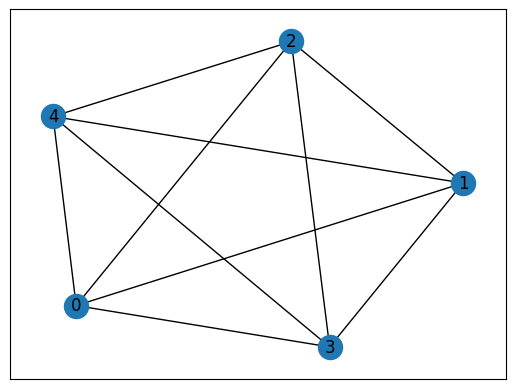

In [ ]:
nx.draw_networkx(g, with_labels=True)

### Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$

-> done

In [ ]:
G.number_of_nodes()

34

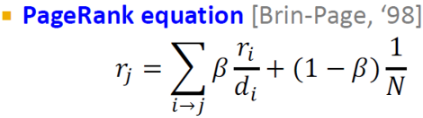

In [ ]:
def one_iter_pagerank(G, beta, r0, node_id):
    """
    G : graph
    beta : hyper-parameter
    r0 : 1 / N (spider trap을 없에기 위한 조치) 이고, 초기치로도 사용 가능
    node_id : for which node to calculate
    """
    # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
    # The return value r1 is one interation PageRank value for the input node.
    # Please round r1 to 2 decimal places.

    r1 = 0

    ############# Your code here ############
    ## Note: 
    ## 1: You should not use nx.pagerank
    
    # step 1 : random walk 계산
    for neighbor in G.neighbors(node_id):
        r1 += beta * (r0) / G.degree(neighbor)
    
    # step 2 : spider trap 보완한거 계산
    r1 += (1 - beta) / G.number_of_nodes()

    #########################################

    PR = nx.pagerank(G, alpha=beta, max_iter=1, tol=r0)
    print("method nx.pagerank : ", PR[node_id])

    return round(r1, 2)

beta = 0.8
r0 = 1 / G.number_of_nodes()        # 1 / N
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

method nx.pagerank :  0.12084791436539437
The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

![image.png](
    
)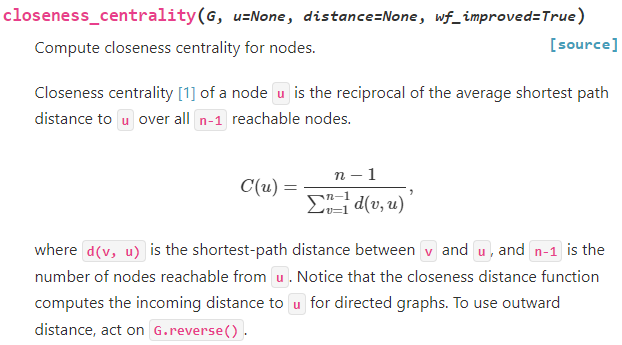

In [ ]:
from networkx.algorithms import centrality
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality 
  # for a node in karate club network. G is the input karate club 
  # network and node is the node id in the graph. Please round the 
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.

  # source로부터의 shortest path length가 딕셔너리 형태로 저장됨.
  lengths = nx.shortest_path_length(G, source=node)

  # just implement Raw closeness
  my_closeness = 0
  for key, value in lengths.items():
    # print(key, value)
    if key != node and value != 0:
        my_closeness += value
  my_closeness = 1/my_closeness

  # method를 사용하면 normalized 되어서 나온다.
  normalized_closeness = nx.closeness_centrality(G)[node]
  # devide by (# of reachable nodes - 1)
  closeness = normalized_closeness / (len(lengths.items()) -1)
  
  print("closeness by imple : ", my_closeness)
  print("closeness by method : ", closeness)
  #########################################

  return my_closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("node {} of the karate club network has closeness centrality {}".format(node, closeness))

closeness by imple :  0.011627906976744186
closeness by method :  0.011627906976744186
node 5 of the karate club network has closeness centrality 0.011627906976744186


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [ ]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.9329, 0.3280, 0.0604, 0.5506],
        [0.9621, 0.0584, 0.0613, 0.8922],
        [0.7878, 0.3961, 0.3402, 0.7341]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [ ]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


## Question 5: Getting the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [ ]:
G

In [ ]:
import numpy as np

def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  edge_list = list(G.edges())
#   print(edge_list)
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.LongTensor([])

  ############# Your code here ############
  start, end = [], []
  for edge in edge_list:
    a, b = edge
    start.append(a)
    end.append(b)
  # start와 end는 각각 1 * 78의 list임.
  edge_index = torch.LongTensor([start, end])
  #########################################
#   print(edge_index)

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Question 6: Please implement following function that samples negative edges. Then you will answer which edges (edge_1 to edge_5) can be negative ones in the karate club network? (10 Points)

In [ ]:
G.number_of_edges()

78

In [ ]:
len(pos_edge_list)

78

In [ ]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loop should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?

  # negative edge : node 번호가 작은 데서 큰 데로 가는 edge
  neg_edge_list = []

  ############# Your code here ############
  pos_edge_list = graph_to_edge_list(G)
  
  # 노드 번호가 작은 데서 큰 데로 가는 edge만 뽑자..
  for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 >= node2:
            continue
        if (node1, node2) in pos_edge_list:
            continue
        neg_edge_list.append((node1, node2))
  neg_edgelist = random.sample(neg_edge_list, num_neg_samples)
  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
# 작은 번호의 노드 -> 큰 번호의 노드로 가는 edge로 만들고, 그게 pos edge에 없으면 neg edge가 될 수 있다.
for edge in [edge_1, edge_2, edge_3, edge_4, edge_5]:
    edge = (edge[1], edge[0]) if edge[1] < edge[0] else edge
    if edge in pos_edge_list:
        print(f"{edge}는 negative edge가 될 수 없다!")
    else:
        print(f"{edge}는 negative edge가 될 수 있다!!!")
#########################################

The neg_edge_index tensor has shape torch.Size([2, 483])
(1, 7)는 negative edge가 될 수 없다!
(1, 33)는 negative edge가 될 수 있다!!!
(22, 33)는 negative edge가 될 수 없다!
(0, 4)는 negative edge가 될 수 없다!
(2, 4)는 negative edge가 될 수 있다!!!


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.0.1+cu118


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [ ]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

# emb_sample은 8차원의 임베딩 4개를 학습한다.
emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [ ]:
# Select an embedding in emb_sample
print("id : ", id)
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print("\nids : ", ids)
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)
print(emb_sample.weight.data)

# Overwrite the weight to tensor with all ones
# emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
# 가지고 있던거 반환만 함.. 5번 째 노드는 없음.
ids = torch.LongTensor([0, 3])
# ids = torch.LongTensor([0, 5])        # error
print("\nids : ", ids)
print(emb_sample(ids))

id :  tensor([1])
tensor([[-0.5956,  1.1019,  0.5539, -0.9509, -0.5039,  1.7359,  1.1365,  0.7353]],
       grad_fn=<EmbeddingBackward0>)

ids :  tensor([1, 3])
tensor([[-0.5956,  1.1019,  0.5539, -0.9509, -0.5039,  1.7359,  1.1365,  0.7353],
        [-0.4999,  0.0399, -0.7815,  0.3195,  0.8211,  0.8643,  0.4917,  0.4454]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[ 0.3467,  1.1960,  0.0507, -2.4047,  0.6637, -0.3969,  0.4049,  0.3415],
        [-0.5956,  1.1019,  0.5539, -0.9509, -0.5039,  1.7359,  1.1365,  0.7353],
        [-0.6371, -0.8895,  0.5974, -0.6193,  1.2090,  0.8097, -0.3727, -0.5333],
        [-0.4999,  0.0399, -0.7815,  0.3195,  0.8211,  0.8643,  0.4917,  0.4454]])

ids :  tensor([0, 3])
tensor([[ 0.3467,  1.1960,  0.0507, -2.4047,  0.6637, -0.3969,  0.4049,  0.3415],
        [-0.4999,  0.0399, -0.7815,  0.3195,  0.8211,  0.8643,  0.4917,  0.4454]],
       grad_fn=<EmbeddingBackward0>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [ ]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))
print(emb.weight.data.shape)    # 34개의 노드에 대한 각각의 16 차원의 임베딩

Embedding: Embedding(34, 16)
tensor([[-1.5256, -0.7502, -0.6540, -1.6095, -0.1002, -0.6092, -0.9798, -1.6091,
         -0.7121,  0.3037, -0.7773, -0.2515, -0.2223,  1.6871,  0.2284,  0.4676],
        [-0.9274,  0.5451,  0.0663, -0.4370,  0.7626,  0.4415,  1.1651,  2.0154,
          0.1374,  0.9386, -0.1860, -0.6446,  1.5392, -0.8696, -3.3312, -0.7479]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([34, 16])


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then visualize each point, colored by the community it belongs to.

In [ ]:
G.nodes.data()

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

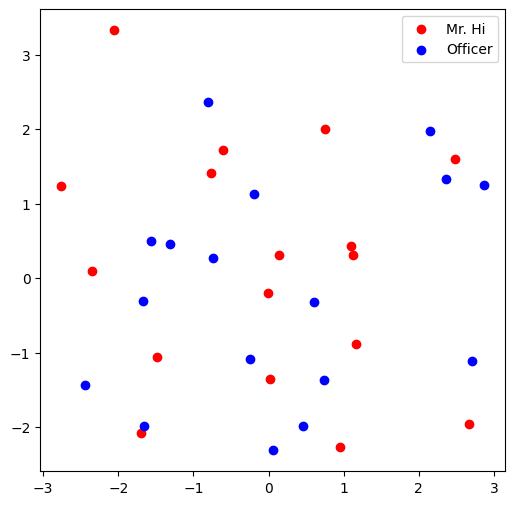

In [ ]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    # node의 club 특성에 따라 색깔을 다르게 visualization
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)

In [ ]:
train_edge.size()

torch.Size([2, 561])

torch.Size([2, 561])


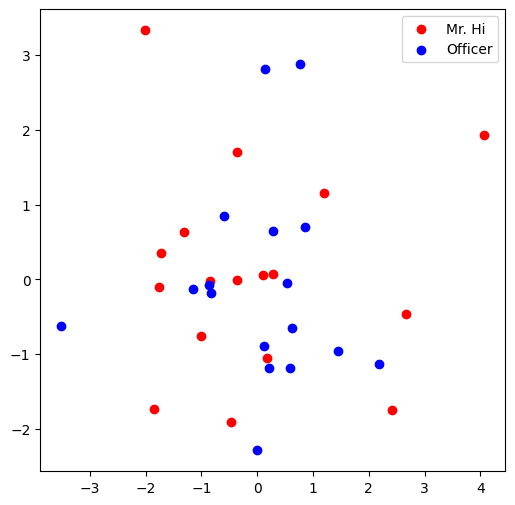

epochs: 0, loss : 1.4396, acc : 0.6328
epochs: 100, loss : 0.3912, acc : 0.8414
epochs: 200, loss : 0.3309, acc : 0.8717
epochs: 300, loss : 0.3139, acc : 0.8734
epochs: 400, loss : 0.3053, acc : 0.8752
epochs: 500, loss : 0.3000, acc : 0.8752
epochs: 600, loss : 0.2966, acc : 0.8752
epochs: 700, loss : 0.2942, acc : 0.8752
epochs: 800, loss : 0.2925, acc : 0.8752
epochs: 900, loss : 0.2913, acc : 0.8752


In [ ]:
from torch.optim import SGD

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  """
  tp, tn = 0, 0
  for i in range(len(pred)):
    if (pred[i] > 0.5):
        if label[i] == 1:
            tp += 1
    else:
        if label[i] == 0:
            tn += 1
  accu = round((tp + tn)/len(pred), 4)
  """

  accu = torch.sum(torch.round(pred) == label).item() / pred.shape[0]
  accu = round(accu, 4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    # TODO: Train the embedding layer here. You can also change epochs and 
    # learning rate. In general, you need to implement: 
    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch 
    # (as a sanity check, the loss should decrease during training)

    epochs = 1000
    learning_rate = 0.01

    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

    for i in range(epochs):
        
        ############# Your code here ############
        optimizer.zero_grad()

        out = emb(train_edge)

        """
        print(out.size()) : [2, 561, 16]
            -> 모든 561개의 edge에 대한 16차원 embedding의 모음
        print(out[0].size(), out[1].size()) : [516, 16], [516, 16]
            -> out[0] : start node에 대한 임베딩
            -> out[1] : end node에 대한 임베딩
        print(torch.matmul(out[0], out[1].T).size()) : [516, 516]
            -> 각 노드에 대한 dot product
        """
        temp = torch.matmul(out[0], out[1].T)
        out = torch.matmul(out[0], out[1].T)[0]
        out = sigmoid(out)

        # print(out.size(), train_label.size())

        acc = accuracy(out, train_label)
        loss = loss_fn(out, train_label)

        if i % 100 == 0:
            print(f"epochs: {i}, loss : {loss:.4f}, acc : {acc}")

        loss.backward()
        optimizer.step()
        #########################################

    # print(temp[0] == temp[-11])

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.size())

emb = create_node_emb()
visualize_emb(emb)

train(emb, loss_fn, sigmoid, train_label, train_edge)

## Visualize the final node embeddings
Visualize your final embedding here! 
You can visually compare the figure with the previous embedding figure. 
After training, you should oberserve that the two classes are more evidently separated. 
This is a great sanitity check for your implementation as well.

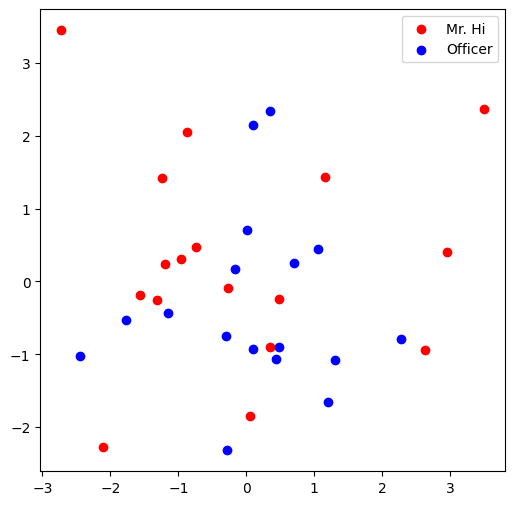

In [ ]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.